In [1]:
# k-Nearest Neighbors
# data points are classified as outliers based on their similarity to their nearest neighbors

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import NearestNeighbors

In [3]:
data = pd.read_csv("C:\\Users\\madhu\\OneDrive\\Desktop\\DMPA_CCEB_38_57_62\\cleaned_data_1.csv")
data.sample (3)

,id,line_item_quantity,unit_price,pack_price,line_item_value,line_item_insurance,sub_classification,dosage,weight
2290,26927,62,0.39,23.36,1448.18,1.79,Adult,300mg,Weight Captured Separately
4450,82324,22571,0.19,11.22,253246.62,546.00,Adult,150/300/200mg,2657
6519,85009,4,0.15,4.61,18.44,0.02,Adult,300/300mg,34119


In [4]:
# Select features for anomaly detection
X = data[['pack_price','line_item_value']]

# Feature scaling [to ensure that features with different scales do not dominate the analysis]. 
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
#  It transforms the features such that they have a mean of 0 and a standard deviation of 1

In [5]:
# Create a K-NN model ;
n_neighbors = 5
knn_model = NearestNeighbors(n_neighbors=n_neighbors)
knn_model.fit(X_scaled)

NearestNeighbors()

In [6]:
# Find distances to k-nearest neighbors ; & Calculate anomaly scores ;  Set a threshold to distinguish outliers
distances, _ = knn_model.kneighbors(X_scaled)

anomaly_scores = distances.mean(axis=1)

threshold = np.percentile(anomaly_scores, 99)
print(threshold)

0.16373138787890962


In [7]:
# Identify outliers
outliers = data[anomaly_scores > threshold]

In [8]:
print("Anomaly Scores Above Threshold:", outliers)

Anomaly Scores Above Threshold:          id  line_item_quantity  unit_price  pack_price  line_item_value  \
66     1109               10240        0.34       41.10        420864.00   
85     1299               71577        0.51       15.20       1087970.40   
97     1519                 100        0.55      183.33         18333.00   
169    2685               60784        0.56       16.75       1018132.00   
243    3956                 200        0.61      163.44         32688.00   
...     ...                 ...         ...         ...              ...   
5642  83910              131607        0.13        7.72       1016006.04   
5968  84302               46009        0.17       20.48        942264.32   
6397  84837               43169        0.18       21.00        906549.00   
6948  85573               41943        0.16       18.64        781817.52   
7646  86480               24470        0.25       29.68        726269.60   

      line_item_insurance sub_classification         do

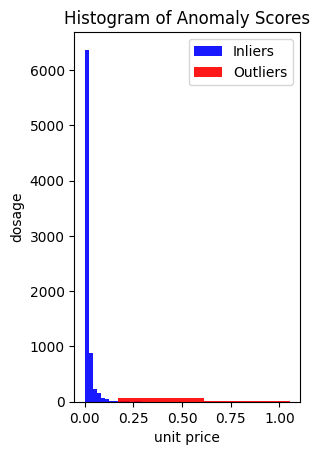

In [9]:
X = data[['unit_price', 'dosage']]
# Visualize outliers using a histogram
plt.subplot(1, 2, 2)
plt.hist(anomaly_scores, bins=50, color='blue', alpha=0.9, label='Inliers')
plt.hist(anomaly_scores[anomaly_scores > threshold], bins=2, color='red', alpha=0.9, label='Outliers')
plt.xlabel('unit price')
plt.ylabel('dosage')
plt.title('Histogram of Anomaly Scores')
plt.legend()

threshold is 0.16373138787890962
Anomaly Scores Above Threshold: [0.21941771 0.35501109 0.77809437 0.34459658 0.62020596 0.21452745
 0.2737354  0.70679701 1.03914366 0.49914031 0.79232153 0.25606341
 0.18441564 0.22030465 0.41280457 0.21624149 0.18115838 0.27674917
 0.57950873 0.3995014  0.28581597 0.39852522 0.26812429 0.17606673
 0.18203363 0.62275085 0.26707798 0.88058546 0.22553925 0.21342539
 0.43681691 0.18999864 0.36804336 0.22553925 0.49761058 0.27581713
 0.27627538 0.43159175 0.19934154 0.61446221 0.26482789 0.2025678
 0.88328484 0.46413106 0.17559602 0.2670067  0.97745566 0.27138792
 0.23612645 0.88353691 0.21109891 0.17573753 0.17473623 0.52008197
 0.21855361 1.05098465 0.21897618 0.16973706 0.18508317 0.44689045
 1.05250467 0.30646983 0.21538971 0.17202929 0.19925743 0.23055165
 0.22529765 0.24580689 0.1860935  0.24402018 0.18916034 0.26031449
 0.38806625 0.26562044 0.20416564 0.18737028 0.19082368 0.22114663
 0.17647951]


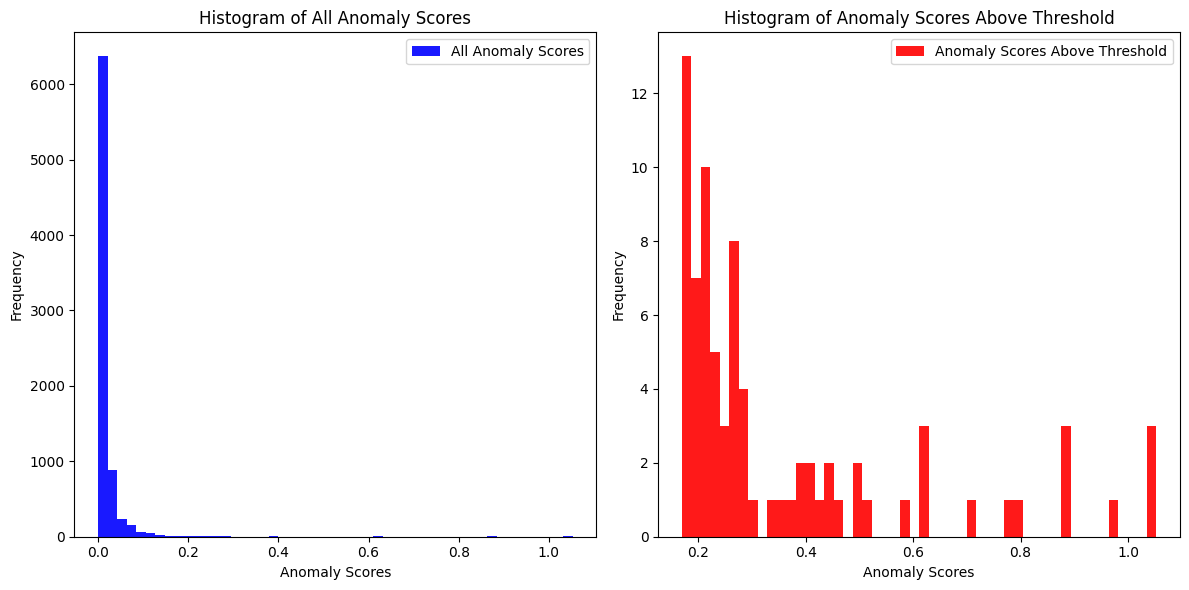

In [10]:
print("threshold is",threshold)
print("Anomaly Scores Above Threshold:", anomaly_scores[anomaly_scores > threshold])
# Create a figure and subplot for the histogram
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)

plt.hist(anomaly_scores, bins=50, color='blue', alpha=0.9, label='All Anomaly Scores')

plt.xlabel('Anomaly Scores')
plt.ylabel('Frequency')
plt.title('Histogram of All Anomaly Scores')
plt.legend()

plt.subplot(1, 2, 2)

plt.hist(anomaly_scores[anomaly_scores > threshold], bins=50, color='red', alpha=0.9, label='Anomaly Scores Above Threshold')

plt.xlabel('Anomaly Scores')
plt.ylabel('Frequency')
plt.title('Histogram of Anomaly Scores Above Threshold')
plt.legend()

plt.tight_layout()
plt.show()


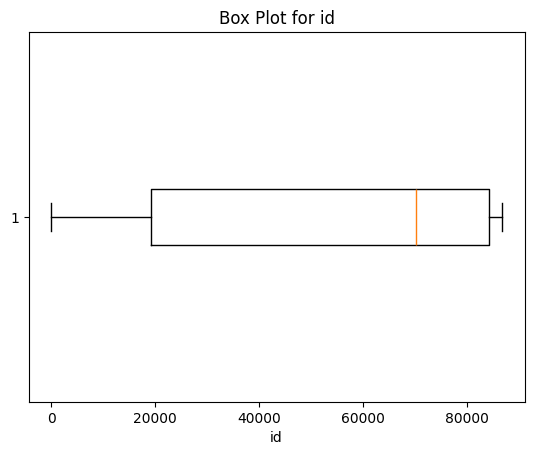

In [11]:
# Data points above the upper/below whisker are potential upper/lower outliers. [1.5 times the IQR]
plt.boxplot(data['id'], vert=False)
plt.xlabel('id')
plt.title('Box Plot for id')
plt.show()


Text(0.5, 1.0, '')

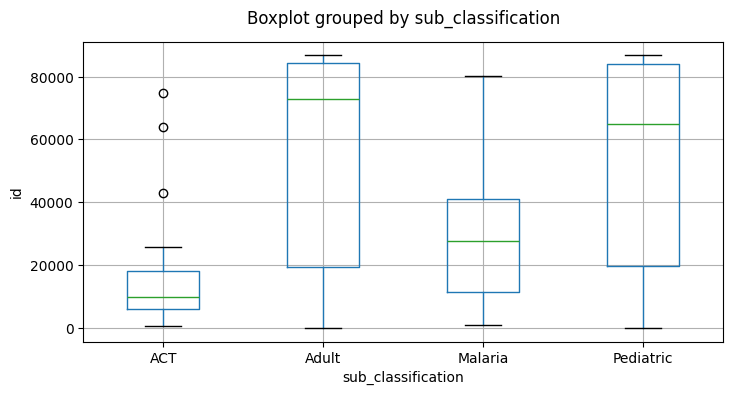

In [12]:
ax=data.boxplot(column="id", by="sub_classification",figsize=(8,4))
ax.set_ylabel("id")
ax.set_title("")

threshold is 0.16373138787890962
Anomalies in 'sub classification':
     sub_classification     id
66                Adult   1109
85                Adult   1299
97                Adult   1519
169               Adult   2685
243               Adult   3956
...                 ...    ...
5642              Adult  83910
5968              Adult  84302
6397              Adult  84837
6948              Adult  85573
7646              Adult  86480

[79 rows x 2 columns]


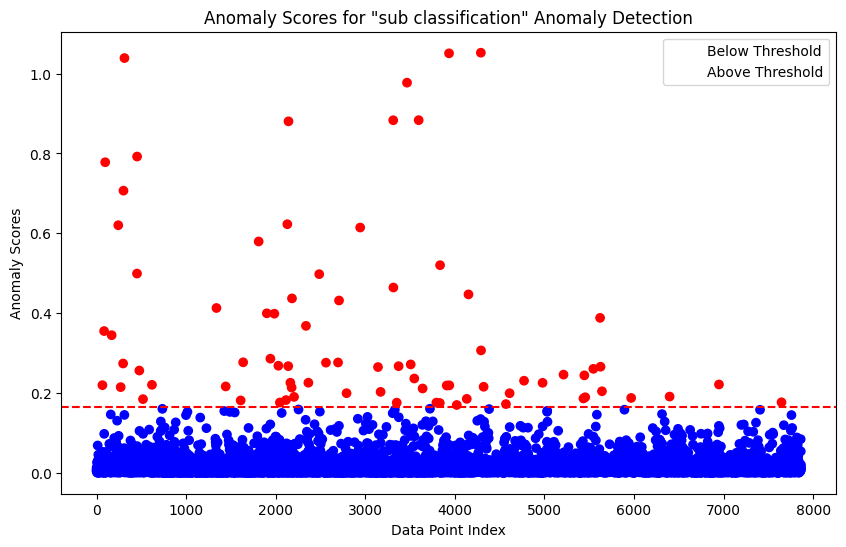

In [13]:
anomaly_scores = distances.mean(axis=1)
#  99th percentile
threshold = np.percentile(anomaly_scores, 99)

anomalies = data[anomaly_scores > threshold]
print("threshold is",threshold)
print("Anomalies in 'sub classification':")
print(anomalies[['sub_classification', 'id']])

below_threshold_color = 'b'  
above_threshold_color = 'r'
  
#scatter plot
plt.figure(figsize=(10, 6))
scatter = plt.scatter(data.index, anomaly_scores, c=[below_threshold_color if score <= threshold else above_threshold_color for score in anomaly_scores], label='Anomaly Scores')
plt.axhline(y=threshold, color='r', linestyle='--', label='Threshold')

plt.xlabel('Data Point Index')
plt.ylabel('Anomaly Scores')
plt.title('Anomaly Scores for "sub classification" Anomaly Detection')
plt.legend()

custom_legend = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=below_threshold_color, markersize=1, label='Below Threshold'),
                plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=above_threshold_color, markersize=1, label='Above Threshold')]
plt.legend(handles=custom_legend)

plt.show()
